In [1]:
import numpy as np
# https://hackernoon.com/implementing-the-perceptron-algorithm-from-scratch-in-python-48be2d07b1c0

In [2]:
# class Perceptron(object):

#     # The no_of_inputs is used to determine how many weights we need to learn.
#     # The threshold, is the number of epochs we’ll allow our learning algorithm to iterate through before ending.
#     # The learning_rate is used to determine the magnitude of change for our weights during each step through our training data.
#     def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01):
#         self.threshold = threshold
#         self.learning_rate = learning_rate
#         # Here, we initialize our weight vector. np.zeros(n), will create a vector with an n-number of 0’s. Here, we use 
#         # the no_of_inputs, (which again, is number of inputs in our input vector, x), plus 1.
#         self.weights = np.zeros(no_of_inputs + 1)
           
#     def predict(self, inputs):
#         summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
#         if summation > 0:
#           activation = 1
#         else:
#           activation = 0            
#         return activation

#     def train(self, training_inputs, labels):
#         for _ in range(self.threshold):
#             for inputs, label in zip(training_inputs, labels):
#                 prediction = self.predict(inputs)
#                 self.weights[1:] += self.learning_rate * (label - prediction) * inputs
#                 self.weights[0] += self.learning_rate * (label - prediction)

In [8]:
#import packages
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#load the breast cancer data
breast_cancer = sklearn.datasets.load_breast_cancer()

#convert the data to pandas dataframe.
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
data["class"] = breast_cancer.target
data.head()
data.describe()


path = 'Logisticdataset.csv'
attributes = ['x1','x2','y']
dataset = pd.read_csv(path, names = attributes)
dataset.head()
dataset.describe()

,x1,x2,y
count,101,101,101
unique,84,92,3
top,0.9008,3.8128,0.0
freq,3,2,50


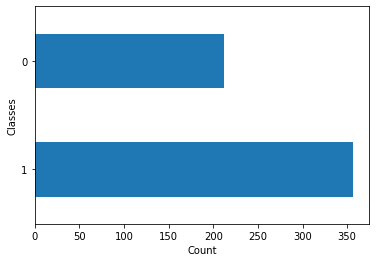

In [9]:
#plotting a graph to see class imbalance
data['class'].value_counts().plot(kind = "barh")
plt.xlabel("Count")
plt.ylabel("Classes")
plt.show()

from sklearn.preprocessing import MinMaxScaler
#perform scaling on the data.
X = data.drop("class", axis = 1)
Y = data["class"]
mnscaler = MinMaxScaler()
X = mnscaler.fit_transform(X)
X = pd.DataFrame(X, columns=data.drop("class",axis = 1).columns)

#train test split.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, stratify = Y, random_state = 1)

In [10]:
class Perceptron:
  
  #constructor
  def __init__ (self):
    self.w = None
    self.b = None
    
  #model  
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
  
  #predictor to predict on the data based on w
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs = 1, lr = 1):
    self.w = np.ones(X.shape[1])
    self.b = 0
    accuracy = {}
    max_accuracy = 0
    wt_matrix = []
    #for all epochs
    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b - lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b + lr * 1
          
      wt_matrix.append(self.w)    
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
    #checkpoint (Save the weights and b value)
    self.w = chkptw
    self.b = chkptb
        
    print(max_accuracy)
    #plot the accuracy values over epochs
    plt.plot(accuracy.values())
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.ylim([0, 1])
    plt.show()
    
    #return the weight matrix, that contains weights over all epochs
    return np.array(wt_matrix)

In [11]:
perceptron = Perceptron()

#epochs = 10000 and lr = 0.3
wt_matrix = perceptron.fit(X_train, Y_train, 10000, 0.3)

#making predictions on test data
Y_pred_test = perceptron.predict(X_test)

#checking the accuracy of the model
print(accuracy_score(Y_pred_test, Y_test))

TypeError: Cannot cast array data from dtype('float64') to dtype('<U32') according to the rule 'safe'